# Happiness_corruption_2015-2020

In this dataframe, I am analyzing the happiest countries in the world and trying to identify whether exist a correlation or not with some of the variables used to measure the happiness. So as to search for strong correlation, the analysis will be focused on bivariate and multivariate analysis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.formula.api as smf

Happines is measured by 6 variables, which gives a global vision about the
happines in the world by country.

Dystopia is the term to refer an imaginary country with lowest happines level, meanwhile, utupia is the contradictory

cpi:corruption perception index

In [4]:
world_hap_corrp_df=pd.read_csv('/content/drive/MyDrive/WorldHappiness_Corruption_2015_2020.csv')
world_hap_corrp_df.head()


,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


**Identifying the continents, in order to make a deep analysis, Austrilia continent is changed to Oceania**

In [ ]:
print(f'Name of continents:{world_hap_corrp_df.continent.unique()}')
world_hap_corrp_df.continent.replace(to_replace='Australia', value='Oceania',inplace=True) # replace the value in the original dataframe
print(f'Name of continents:{world_hap_corrp_df.continent.unique()}')

Name of continents:['Europe' 'North America' 'Australia' 'Asia' 'South America' 'Africa']
Name of continents:['Europe' 'North America' 'Oceania' 'Asia' 'South America' 'Africa']


# Verifying null data in the dataframe

In [6]:
#verifying null data
print(f'Null data:{world_hap_corrp_df.isnull().sum().any()} elements')

Null data:False elements


# Getting the main statistics from numeric variables

In [7]:
world_hap_corrp_df.describe(include=np.number)

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


<Axes: xlabel='Year', ylabel='happiness_score'>

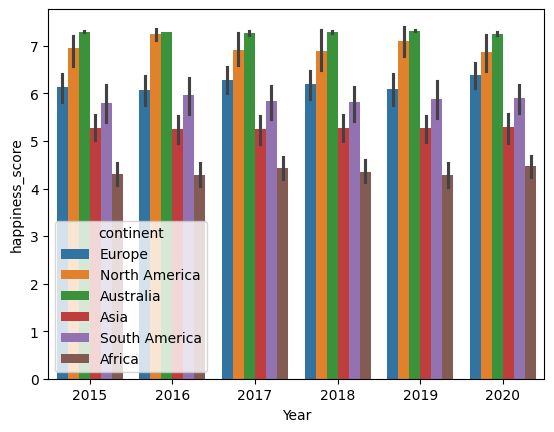

In [8]:
sns.barplot(world_hap_corrp_df,x='Year',y='happiness_score',hue='continent')

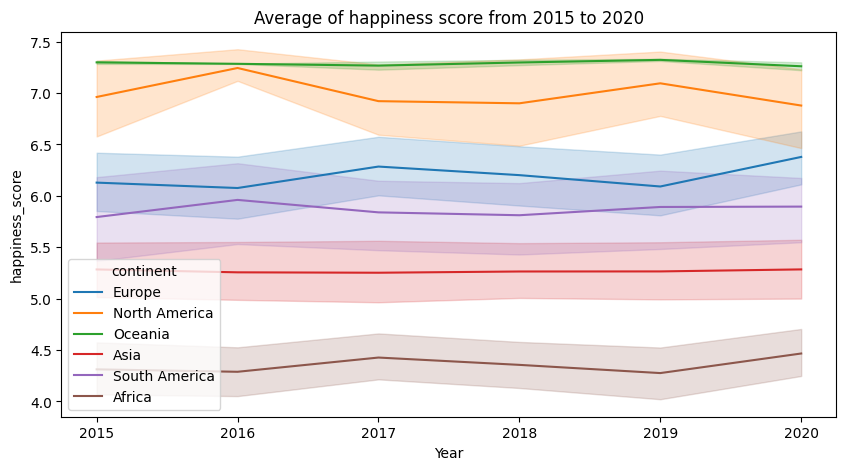

In [ ]:

#display(world_hap_corrp_df.query("continent=='Europe' & Year==2015").reset_index())
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.lineplot(data=world_hap_corrp_df,x='Year',y='happiness_score',hue='continent')
plt.title('Average of happiness score from 2015 to 2020')
plt.show()


<Axes: xlabel='happiness_score', ylabel='Density'>

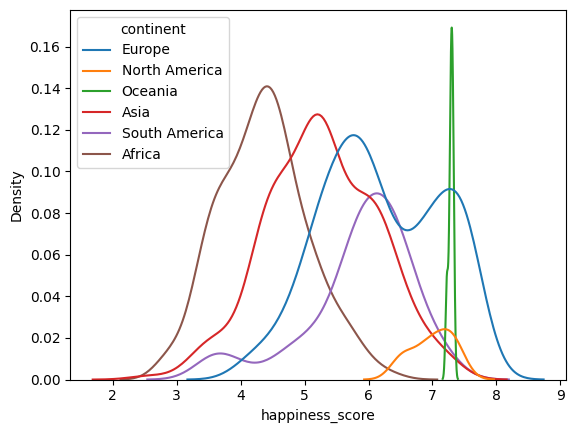

In [ ]:
sns.kdeplot(world_hap_corrp_df,x='happiness_score',hue='continent',)

# Indentifying what countries are the happiest by continent

<Axes: xlabel='Year', ylabel='happiness_score'>

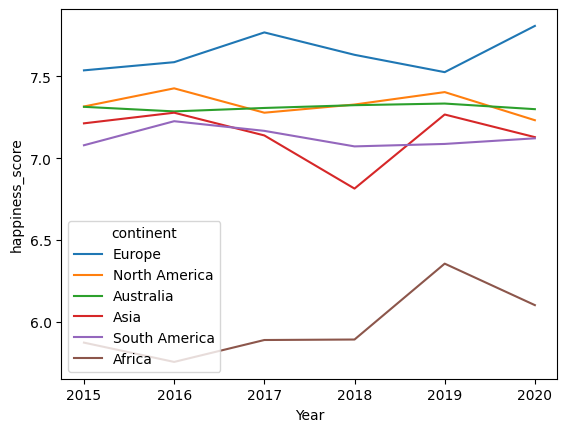

In [10]:
continents=world_hap_corrp_df.continent.unique()    #list with the continent names
years=world_hap_corrp_df.Year.unique()              #list with the years
list_index=[]                                       #list to save the index from word_hap_corrp

for c in continents:
  for y in years:
    df=world_hap_corrp_df.loc[(world_hap_corrp_df.continent==c)&(world_hap_corrp_df.Year==y)] #applying the filter by country and year
    df.sort_values(by=['happiness_score'])          #sorting the values by happiness_score column
    list_index.append(df.index[0])                  #add the elements by index to the list
    df=pd.DataFrame()                               #cleaning the dataframe to avoid overwrite


#Unzipping the info
df_hap_coun=world_hap_corrp_df.iloc[list_index]     # ------> dataframe with the info by country and continent

sns.lineplot(data=df_hap_coun,x='Year',y='happiness_score',hue='continent')

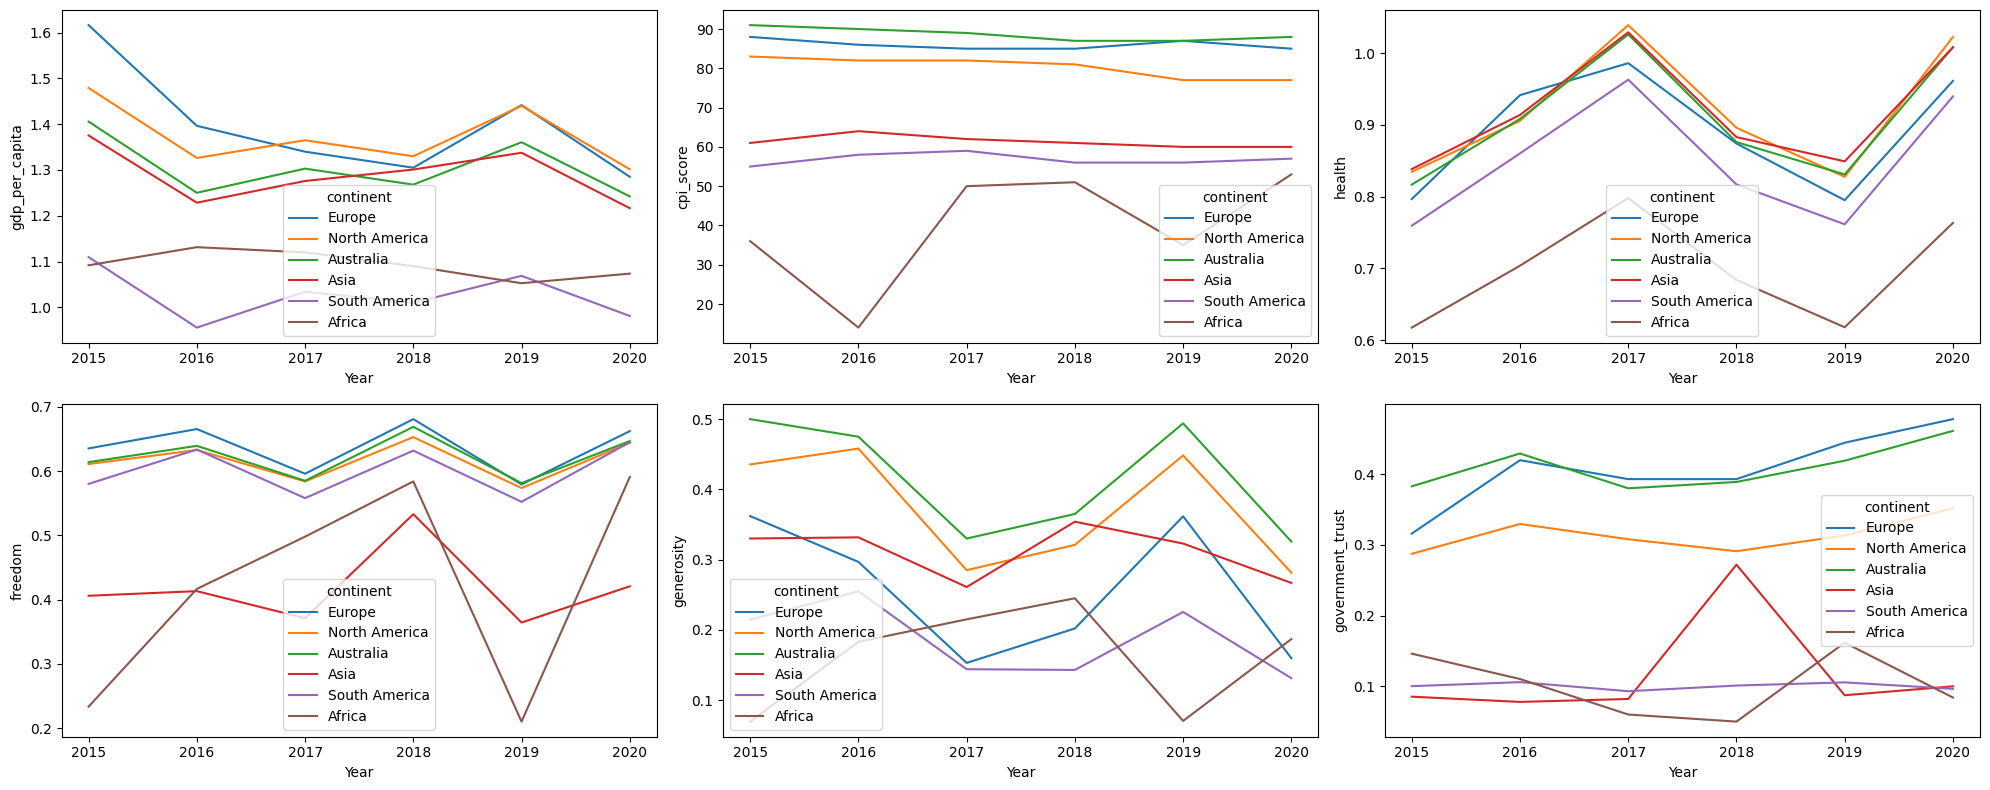

In [11]:
fig,(axes)=plt.subplots(2,3,figsize=(20,8))
sns.lineplot(df_hap_coun,x='Year',y='gdp_per_capita',hue='continent',ax=axes[0,0])
sns.lineplot(df_hap_coun,x='Year',y='cpi_score',hue='continent',ax=axes[0,1])
sns.lineplot(df_hap_coun,x='Year',y='health',hue='continent',ax=axes[0,2])
sns.lineplot(df_hap_coun,x='Year',y='freedom',hue='continent',ax=axes[1,0])
sns.lineplot(df_hap_coun,x='Year',y='generosity',hue='continent',ax=axes[1,1])
sns.lineplot(df_hap_coun,x='Year',y='government_trust',hue='continent',ax=axes[1,2])
fig.tight_layout()

#Bivariate analysis

<Axes: xlabel='gdp_per_capita', ylabel='happiness_score'>

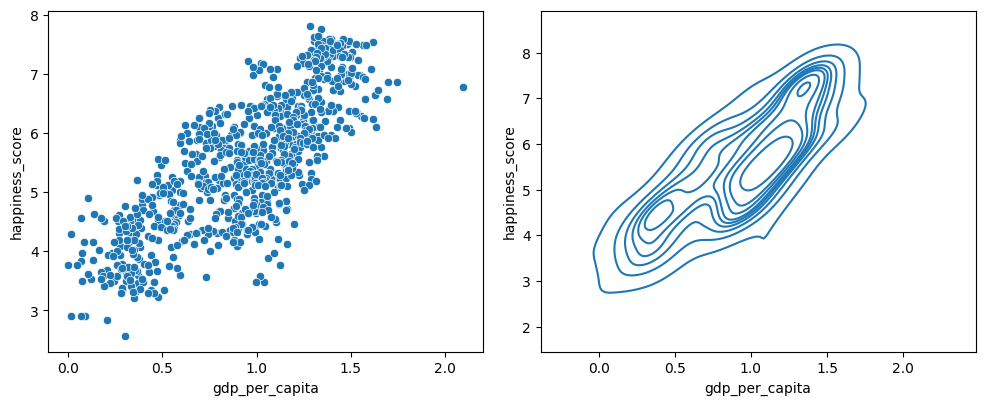

In [12]:
fig,(axes1,axes2)=plt.subplots(1,2,figsize=(10,4))
fig.tight_layout()

sns.scatterplot(data=world_hap_corrp_df,x=world_hap_corrp_df.gdp_per_capita,y=world_hap_corrp_df.happiness_score,ax=axes1)
sns.kdeplot(data=world_hap_corrp_df,x=world_hap_corrp_df.gdp_per_capita,y=world_hap_corrp_df.happiness_score,ax=axes2)  #kde 2D plot

**In the bivariate analysis, it tries to identify if the dependent variable is related with some independent variable**

<Axes: xlabel='family', ylabel='happiness_score'>

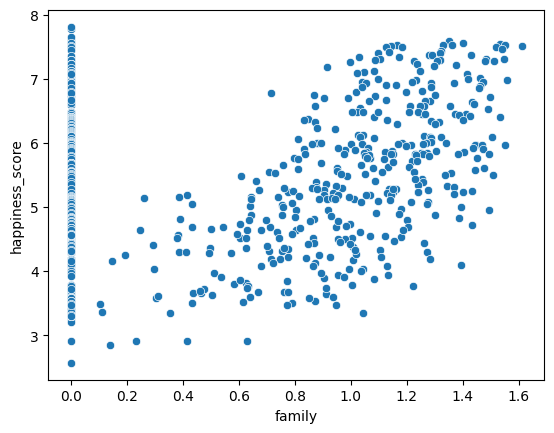

In [ ]:
sns.scatterplot(world_hap_corrp_df,x='family',y='happiness_score')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='continent', ylabel='happiness_score'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.0% of the points cannot be placed

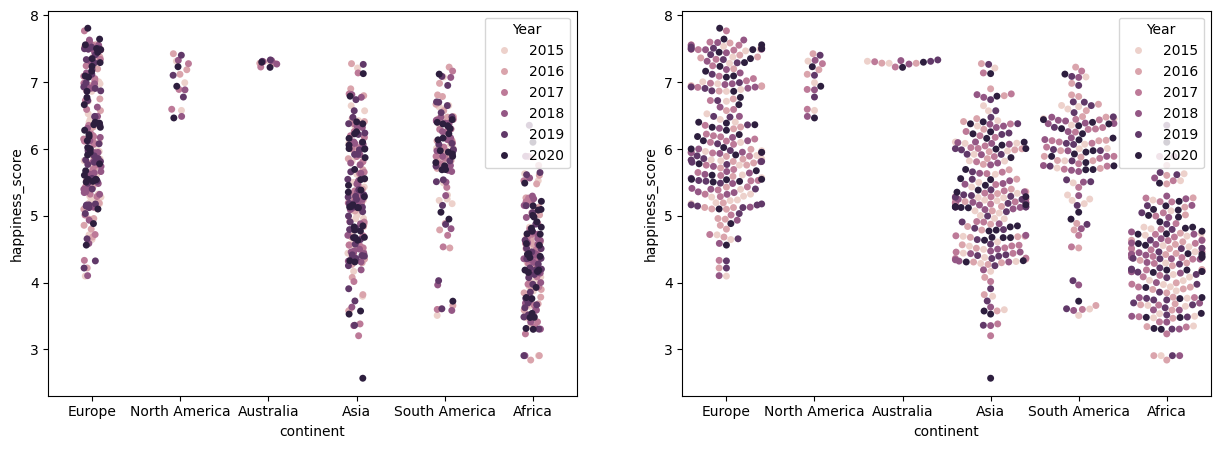

In [13]:
#plotting the data and using swarmplot to have other perspective
fig,(axes)=plt.subplots(1,2,figsize=(15,5))
sns.stripplot(data=world_hap_corrp_df,x='continent',y='happiness_score',hue='Year',ax=axes[0])
sns.swarmplot(data=world_hap_corrp_df,x='continent',y='happiness_score',hue='Year',ax=axes[1])

# Establishing relationships between the different variables

##Observing the correlation with heatmap and using the Pearson coeficient##

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score
happiness_score,1.000000,0.558618,0.093433,0.639936,0.522293,0.425192,0.609599,0.068425,0.003202,0.815970
gdp_per_capita,0.558618,1.000000,0.301971,0.271084,0.221551,0.681625,0.633910,-0.009066,-0.192125,0.697246
family,0.093433,0.301971,1.000000,-0.438021,-0.167603,0.434229,0.037239,0.675982,-0.975235,0.013805
health,0.639936,0.271084,-0.438021,1.000000,0.408189,0.216194,0.361859,-0.287281,0.512984,0.573668
freedom,0.522293,0.221551,-0.167603,0.408189,1.000000,0.344877,0.546895,-0.251681,0.294509,0.672539
generosity,0.425192,0.681625,0.434229,0.216194,0.344877,1.000000,0.479373,0.099486,-0.341075,0.640714
government_trust,0.609599,0.633910,0.037239,0.361859,0.546895,0.479373,1.000000,-0.072552,0.051406,0.823015
dystopia_residual,0.068425,-0.009066,0.675982,-0.287281,-0.251681,0.099486,-0.072552,1.000000,-0.744770,-0.145571
social_support,0.003202,-0.192125,-0.975235,0.512984,0.294509,-0.341075,0.051406,-0.744770,1.000000,0.116792
cpi_score,0.815970,0.697246,0.013805,0.573668,0.672539,0.640714,0.823015,-0.145571,0.116792,1.000000


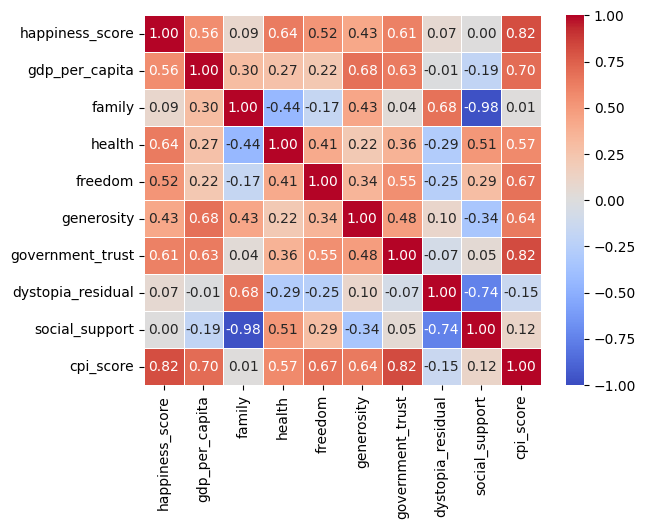

In [20]:
# To work with the dataframe is necessary to get only the numeric values
# using method _get_numeric_data()

sns.heatmap(data=df_hap_coun.drop(columns=['continent','Year'])._get_numeric_data().corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',linewidths=.5,cmap='coolwarm')
df_hap_coun.drop(columns=['continent','Year'])._get_numeric_data().corr()


Now, to observe better, we will use a clustermap, which organize the correlations.

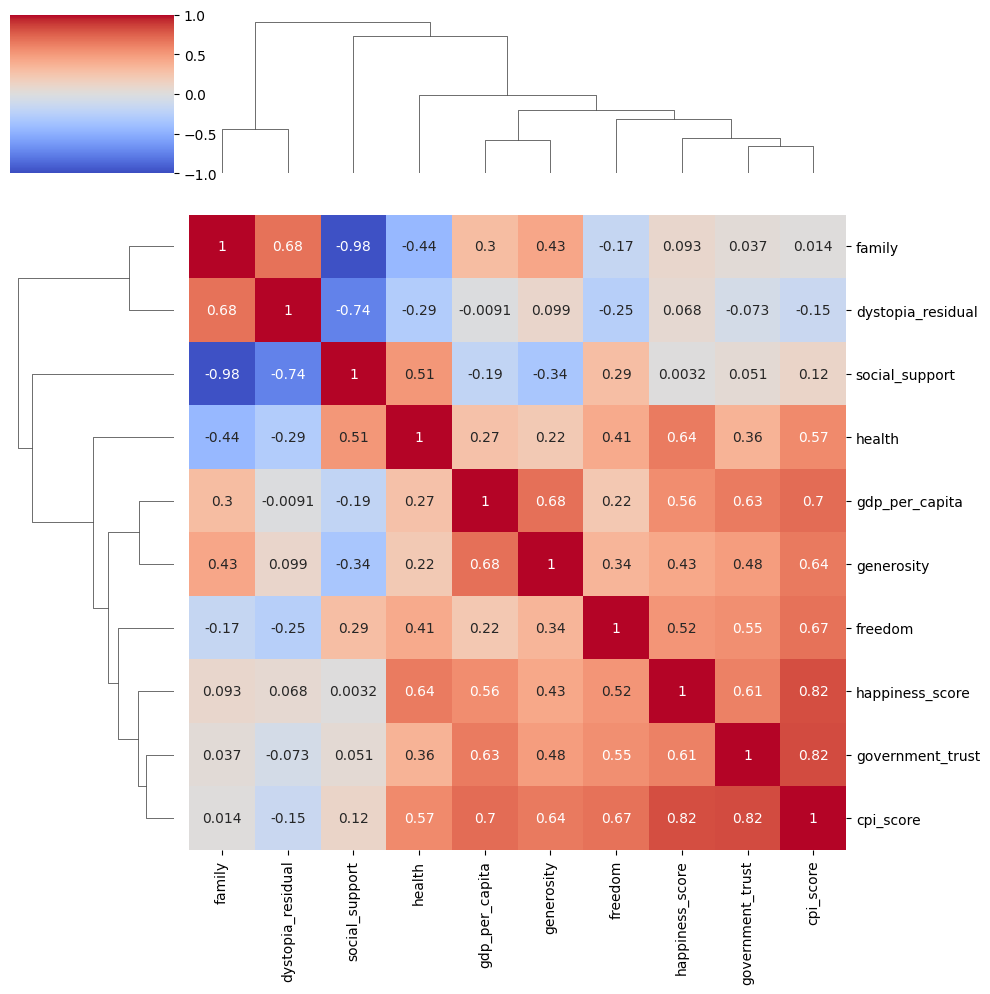

In [21]:
sns.clustermap(data=df_hap_coun.drop(columns=['continent','Year'])._get_numeric_data().corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm')
plt.tight_layout()
plt.show()

# Establishing relationships: Simple regression

In [22]:
# Using the information above, it works with the linear correlation with a considerable value of Pearson coefficient
# In order to search for relationship, the label variable (happiness_score) is the target.

LinregressResult(slope=2.365531993488925, intercept=5.780469787544425, rvalue=0.5222927740604851, pvalue=0.001085059954118847, stderr=0.6623771596547998, intercept_stderr=0.3744537099149692)

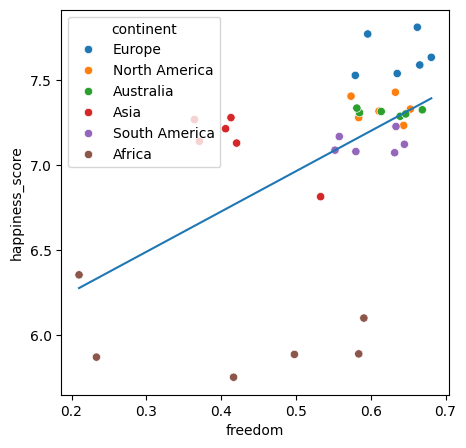

In [23]:
resul_happines=scipy.stats.linregress(x=df_hap_coun.drop(columns=['continent','Year']).freedom,y=df_hap_coun.happiness_score)
display(resul_happines)

#plotting the possible relationship between the selected variables
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_hap_coun,x=df_hap_coun.drop(columns=['continent','Year']).freedom,y=df_hap_coun.happiness_score,hue='continent')

#getting the values from scipy to plot the line
x_regress=np.array([df_hap_coun.freedom.min(),df_hap_coun.freedom.max()])
y_regress=resul_happines.slope*x_regress + resul_happines.intercept
plt.plot(x_regress,y_regress)

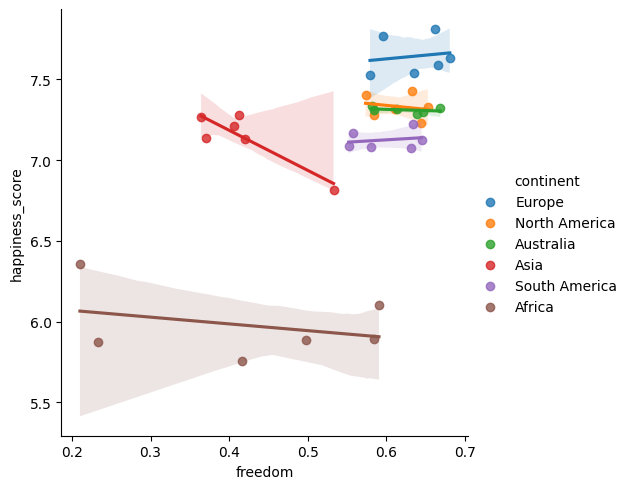

In [24]:
#using seaborn to contrast the info above

sns.lmplot(data=df_hap_coun,x='freedom',y='happiness_score',hue='continent')

# Working with statsmodels to analyze a simple or multiple regression

# Model 0

In [27]:
#  dependen variable ---> happiness_score
#  independ variabe  ---> cpi_score (corruption perceptions index)


# using ols (ordinary least squares)
simple_model=(
    smf.ols(
    formula='happiness_score ~ cpi_score',
    data=df_hap_coun
    ).fit()
)
print(simple_model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     67.74
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.33e-09
Time:                        19:25:48   Log-Likelihood:                -9.0606
No. Observations:                  36   AIC:                             22.12
Df Residuals:                      34   BIC:                             25.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4557      0.205     26.565      0.0

# Model 1

## It is necessary to work with multiple variable to identify if there are some significant relationship or not

In [28]:
#  dependen variable ---> happiness_score
#  independ variabe  ---> generosity + freedom

model_1=(
    smf.ols(
        formula='happiness_score ~ generosity + freedom', data=df_hap_coun
    ).fit()
)
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     8.536
Date:                Thu, 19 Dec 2024   Prob (F-statistic):            0.00103
Time:                        19:27:42   Log-Likelihood:                -21.284
No. Observations:                  36   AIC:                             48.57
Df Residuals:                      33   BIC:                             53.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6499      0.369     15.325      0.0

# Model 2

In [29]:
#  dependen variable ---> happiness_score
#  independ variabe  ---> health + gdp_per_capita  (gross domestic product)

model_2=(
    smf.ols(
        formula='happiness_score ~ health + gdp_per_capita',data=df_hap_coun
    ).fit()
)
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     21.84
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           9.09e-07
Time:                        19:29:29   Log-Likelihood:                -13.614
No. Observations:                  36   AIC:                             33.23
Df Residuals:                      33   BIC:                             37.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0498      0.618      4.

# Model 3

In [30]:
#  dependen variable ---> happiness_score
#  independ variabe  ---> government_trust + gdp_per_capita

model_3=(
    smf.ols(
        formula='happiness_score ~ government_trust + gdp_per_capita',data=df_hap_coun
    ).fit()
)

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     12.01
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           0.000121
Time:                        19:29:50   Log-Likelihood:                -18.948
No. Observations:                  36   AIC:                             43.90
Df Residuals:                      33   BIC:                             48.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4516      0.663  

## Make a dictionary with the info from the data and the models

In [ ]:
# Make a new dictionary with the models and the original value

model_results=pd.DataFrame(
    dict(
        current_value=df_hap_coun.happiness_score,
        prediction_simple_model=simple_model.predict(),
        prediction_model_1=model_1.predict(),
        prediction_model_2=model_2.predict(),
        prediction_model_3=model_3.predict()
    )
)
model_results.head()

,current_value,prediction_simple_model,prediction_model_1,prediction_model_2,prediction_model_3
0,7.537,7.542337,7.350374,7.446168,7.575976
132,7.587,7.494913,7.323286,7.499841,7.519459
264,7.769,7.471200,7.000920,7.532627,7.420268
396,7.632,7.471200,7.229138,7.193457,7.385107
528,7.526,7.518625,7.241815,7.188566,7.604142


<Axes: ylabel='Proportion'>

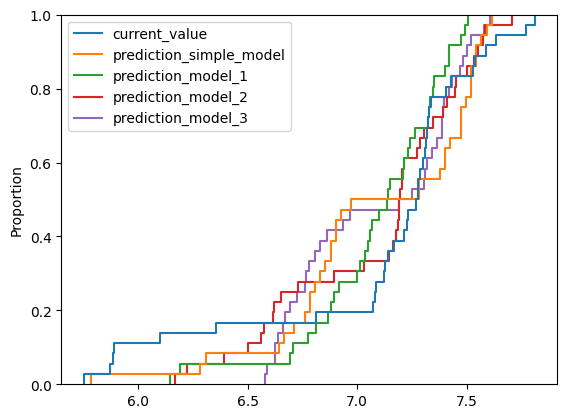

In [ ]:
sns.ecdfplot(data=model_results)


<Axes: ylabel='Density'>

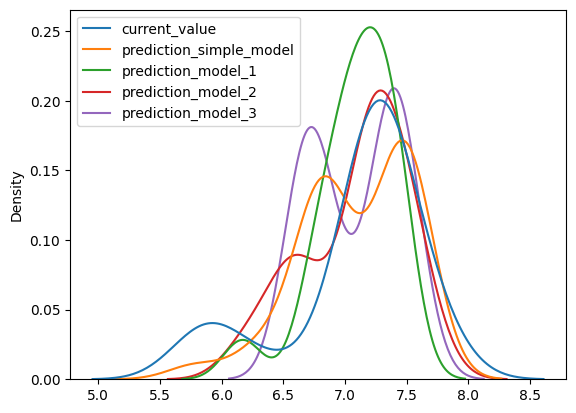

In [ ]:
sns.kdeplot(data=model_results)

# Final conclusions



1.   There are many variables to do the analysis; however, using different combination of them, it could get a high-performance model.
2.   Pearson coefficient shows a high-level of correlation between the corruption perceptions index and the level of happiness, and it is contrasted with the analyzes the cpi_score in the unhappy countries.
3.   Overall, the happiest contries show high-level of corruption perceptions index, government trust adn gross domestic product.
4.   Finally (personal opinion), if the unhappiest countries could improve the government system, they could change their level of happiness based on cpi score, government trust and gross domestic product.

